In [11]:
import numpy as np
import pandas as pd
import plotly as plotly
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
print('numpy',np.__version__)
print('pandas',pd.__version__)
print('plotly',plotly.__version__)
print('seaborn',sns.__version__)

numpy 2.0.2
pandas 2.2.2
plotly 5.24.1
seaborn 0.13.2


In [13]:
event_df = pd.read_csv('/content/athlete_events.csv')
region_df = pd.read_csv('/content/noc_regions.csv')

**Getting sample of data**


In [14]:
display(event_df.head())

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [15]:
display('For event_df :-',event_df.index)
display(event_df.shape)
display(region_df.shape)

'For event_df :-'

RangeIndex(start=0, stop=271116, step=1)

(271116, 15)

(230, 3)

In [16]:
display(event_df.columns.tolist())

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Sport',
 'Event',
 'Medal']

In [17]:
event_df.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


In [18]:
display(event_df[['Age', 'Height', 'Weight']].describe())

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [19]:
event_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


**Choosing only summer season**

In [20]:
event_df = event_df[event_df['Season'] == 'Summer']

In [21]:
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
26,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN


In [22]:
event_df.shape

(222552, 15)

In [23]:
## we will group by on the basis of NOC to get medal tally for each country
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


**Creating a new dataframe that combines information about the events and the regions/countries associated with each NOC.**

how='left': This indicates a left merge. A left merge keeps all rows from the left dataframe (event_df) and matches them with rows from the right dataframe (region_df) based on the 'NOC' column. If a 'NOC' from event_df doesn't have a corresponding entry in region_df, the columns from region_df will have missing values (NaN) for that row.

In [24]:
event_df = event_df.merge(region_df,on='NOC',how='left')
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


**Getting number of Participating countries**

In [25]:
event_df['region'].unique().shape

(206,)

In [26]:
event_df.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9189
Height,51857
Weight,53854
Team,0
NOC,0
Games,0
Year,0


**Checking Duplicates**

In [27]:
event_df.duplicated().sum()

np.int64(1385)

**Removing Duplicates**

In [28]:
event_df.drop_duplicates(inplace=True)

In [29]:
event_df.duplicated().sum()

np.int64(0)

In [30]:
event_df['Medal'].value_counts()

,count
Medal,
Gold,11456
Bronze,11409
Silver,11212


**OHE** of medal section

In [31]:
ohe_medal = pd.get_dummies(event_df['Medal'],dtype=int)
display(ohe_medal)

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0
...,...,...,...
222547,0,0,0
222548,0,0,0
222549,0,0,0
222550,0,0,0


**Horizontly stacking the ohe_medal with event_df**

In [32]:
event_df = pd.concat([event_df,ohe_medal],axis=1)
display(event_df)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222547,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN,Argentina,NaN,0,0,0
222548,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN,USA,NaN,0,0,0
222549,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0
222550,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN,Russia,NaN,0,0,0


**Here we can see the number of medal won by countries is higher than actual value.** This occurs because of team games where medal was 1 but counted as number of team members.So we have to drop the duplicates with same (games,year,city,sport,event,medal,NOC,region)

In [33]:
event_df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
...,...,...,...,...
225,WIF,0,0,5
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [34]:
medal_tally = event_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Medal','Sport','Event'])
display(medal_tally)
medal_tally.shape

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222528,135553,Galina Ivanovna Zybina (-Fyodorova),F,25.0,168.0,80.0,Soviet Union,URS,1956 Summer,1956,Summer,Melbourne,Athletics,Athletics Women's Shot Put,Silver,Russia,NaN,0,0,1
222530,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Soviet Union,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,Russia,NaN,1,0,0
222536,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,NaN,Poland,NaN,0,0,0
222537,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,NaN,Poland,NaN,0,0,0


(105636, 20)

In [35]:
medal_tally = medal_tally.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
display(medal_tally)

,NOC,Gold,Silver,Bronze
0,USA,1035,802,708
1,URS,394,317,294
2,GBR,278,317,300
3,GER,235,261,283
4,FRA,234,256,287
...,...,...,...,...
225,WIF,0,0,2
226,YEM,0,0,0
227,YAR,0,0,0
228,YMD,0,0,0


In [36]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze
50,IND,9,7,12


In [37]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']
display(medal_tally)

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,WIF,0,0,2,2
226,YEM,0,0,0,0
227,YAR,0,0,0,0
228,YMD,0,0,0,0


**Getting years**

In [38]:
years = event_df['Year'].unique().tolist()
years.sort()
years.insert(0,'Overall')
print(years)

['Overall', 1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016]


**Getting participating countries**

In [39]:
country = np.unique(event_df['region'].dropna().values).tolist()
print(country)

['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Antigua', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Boliva', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guam', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 

In [40]:
country.sort()

In [41]:
country.insert(0,'Overall')
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [42]:
medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,WIF,0,0,2,2
226,YEM,0,0,0,0
227,YAR,0,0,0,0
228,YMD,0,0,0,0


In [43]:
def fetch_medal_tally(df,year,country):
  medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Medal','Sport','Event'])
  flag = 0
  if year == 'Overall' and country == 'Overall':
    flag = 1
    temp_df = medal_df

  if year == 'Overall' and country != 'Overall':
    flag = 1
    temp_df = medal_df[medal_df['region'] == country]
  if year != 'Overall' and country == 'Overall':
    temp_df = medal_df[medal_df['Year'] == int(year)]
  if year != 'Overall' and country != 'Overall':
    temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

  if flag == 1:
    x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year',ascending = True).reset_index()
  else:
    x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending = True).reset_index()
  x['total'] = x['Gold'] + x['Silver'] + x['Bronze']

  return x


In [44]:
fetch_medal_tally(event_df,year = 'Overall', country = 'Overall')

,Year,Gold,Silver,Bronze,total
0,1896,44,41,35,120
1,1900,102,99,99,300
2,1904,97,93,90,280
3,1906,74,77,73,224
4,1908,109,107,106,322
5,1912,108,104,104,316
6,1920,158,152,139,449
7,1924,129,131,131,391
8,1928,119,118,119,356
9,1932,125,125,120,370


**Overall Analysis**
*   No. of editions
*   No. of cities
*   No. of events/sports
*   No. of athletes
*   Participating nations



In [45]:
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [46]:
event_df['Year'].unique().shape[0] -1

28

In [47]:
event_df['City'].unique().shape[0]

23

In [48]:
event_df['Sport'].unique().shape[0]

52

In [49]:
event_df['Event'].unique().shape[0]

651

In [50]:
event_df['Name'].unique().shape[0]

116122

In [51]:
event_df['region'].unique().shape[0]

206

**Plotting graphs**
* Region vs Edition
* Event vs Edition
*

In [52]:
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [53]:
def data_over_time(df,col):
  nations_overtime = df.drop_duplicates(['Year',col])['Year'].value_counts().reset_index().sort_values('Year')
  nations_overtime.rename(columns={'Year':'Edition', 'count':col},inplace=True)
  return nations_overtime

In [54]:
nations_overtime = data_over_time(event_df,'region')
nations_overtime.head()

,Edition,region
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22


In [55]:


fig = px.line(nations_overtime, x='Edition', y='region', title='Number of Participating Countries Over Time')
fig.show()

In [56]:
events_over_time = data_over_time(event_df,'Event')
events_over_time.head()


,Edition,Event
28,1896,43
26,1900,90
25,1904,95
27,1906,74
23,1908,109


In [57]:
fig = px.line(events_over_time, x='Edition', y='Event', title='Number of Events Over Time')
fig.show()


In [58]:
athlete_over_time = data_over_time(event_df,'Name')
athlete_over_time.head()

,Edition,Name
28,1896,176
25,1900,1220
27,1904,650
26,1906,841
23,1908,2024


In [59]:
fig = px.line(athlete_over_time, x='Edition', y='Name', title='Number of Athletes Over Time')
fig.show()

**Creating heatmap for event vs edition**
* No. of events in each sport


In [60]:
x = event_df.drop_duplicates(['Year', 'Sport', 'Event'])
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,...,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,...,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,...,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


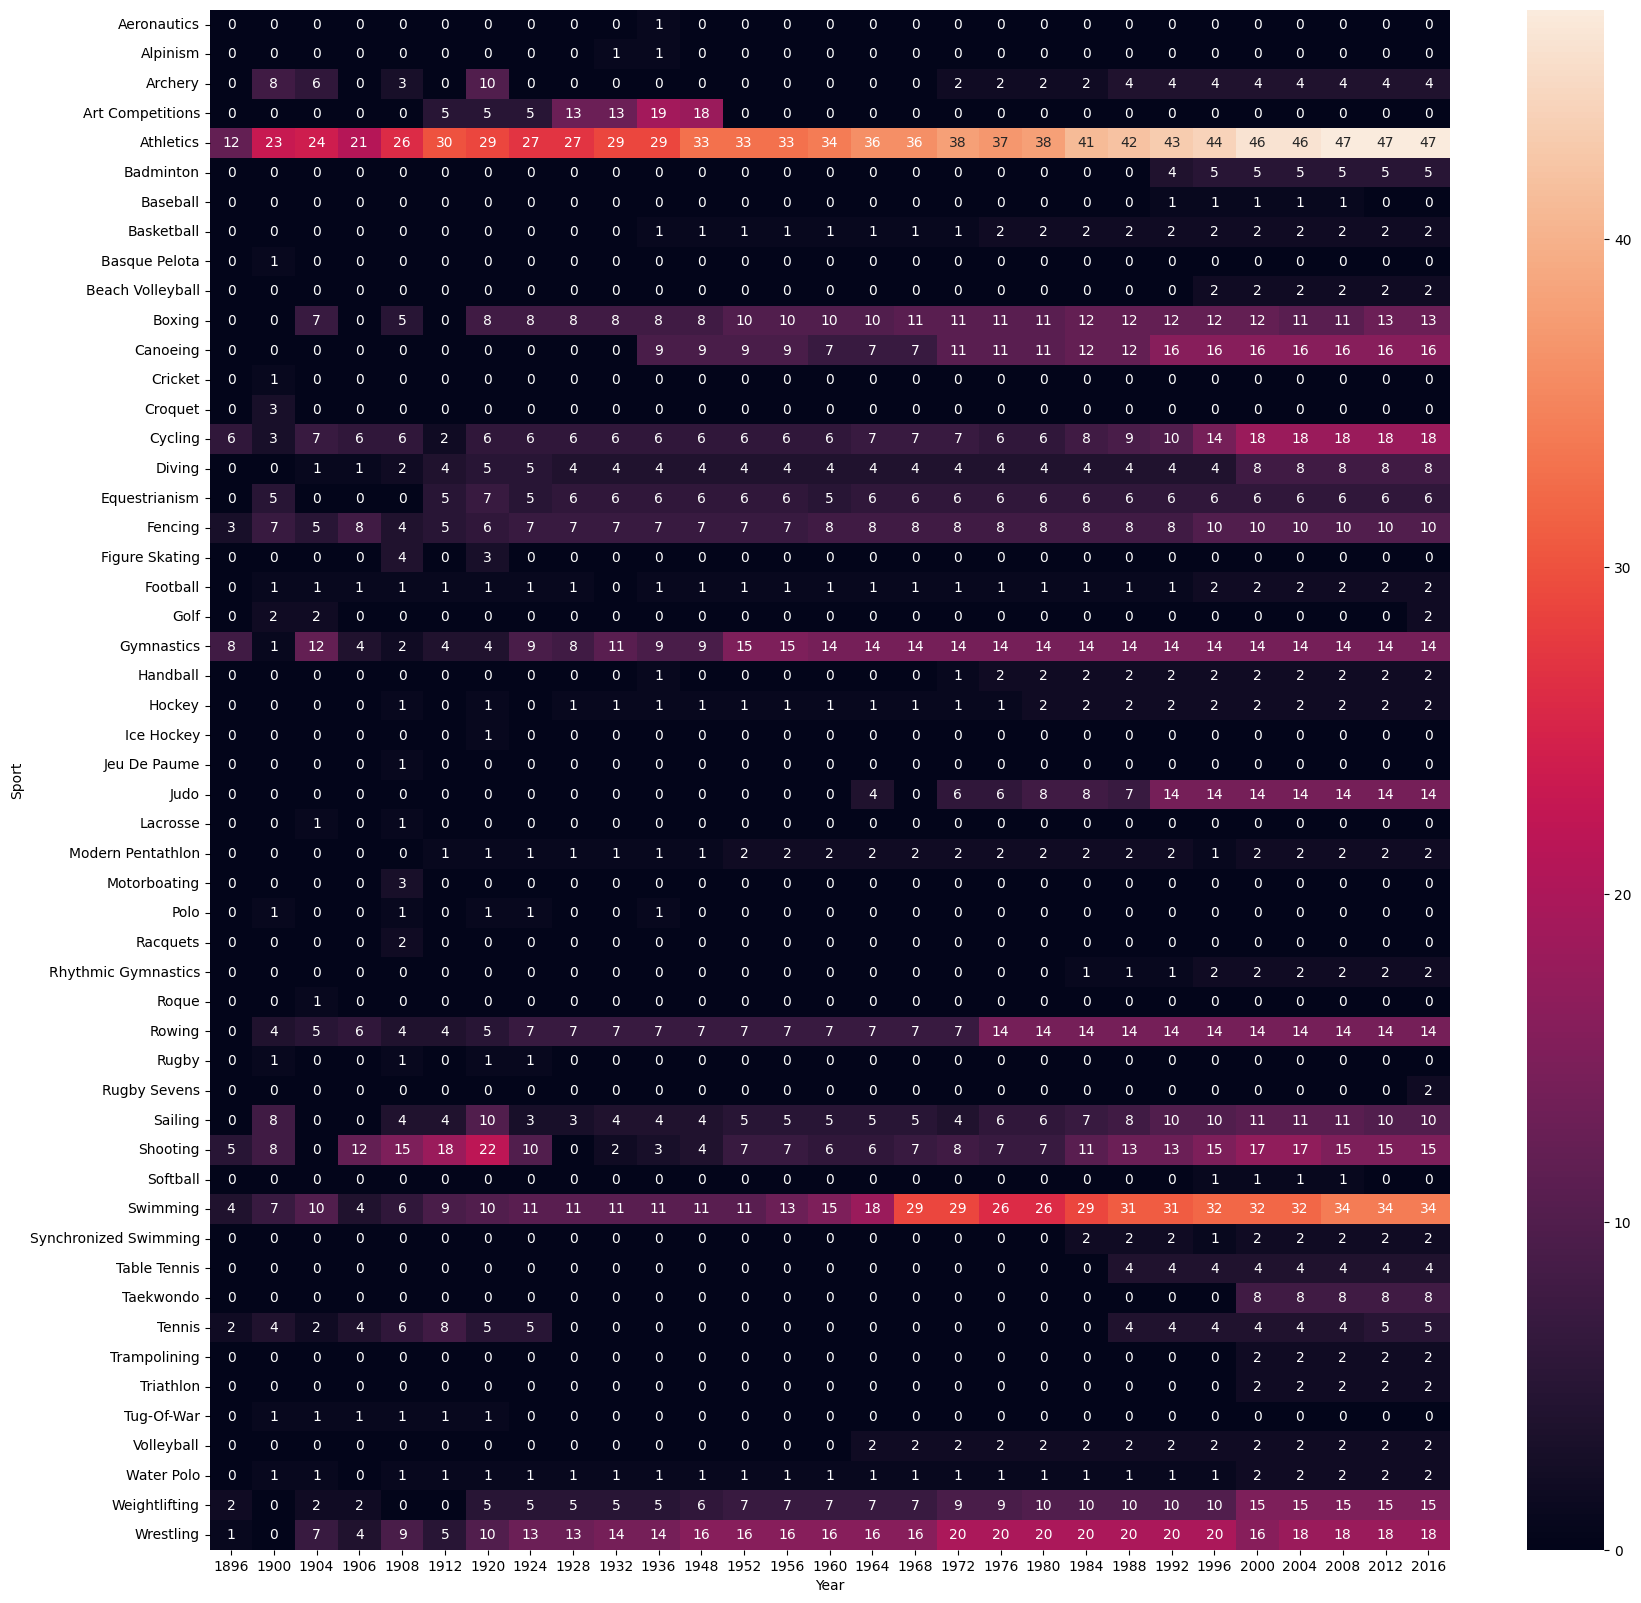

In [61]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [62]:
temp_df = event_df.dropna(subset=['Medal'])
display(temp_df[:1])

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0


In [63]:
def most_successfull(df,sport):
  temp_df = df.dropna(subset=['Medal'])
  display(temp_df.head())
  if sport != 'Overall':
    temp_df = temp_df[temp_df['Sport'] == sport]
    display(temp_df.head())

  # Rename columns after reset_index to 'Name' and 'count'
  athlete_medal_counts = temp_df['Name'].value_counts().reset_index()
  # display(athlete_medal_counts.head())
  # x = athlete_medal_counts.head(20).merge(temp_df,left_on='Name',right_on='Name',how='left').drop_duplicates('Name')
  # x = x[['Name','count','region']]
  return athlete_medal_counts

In [64]:
most_successfull(event_df,'Athletics')

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
12,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN,1,0,0
13,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN,1,0,0
15,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN,1,0,0
16,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN,0,1,0


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
101,67,Mariya Vasilyevna Abakumova (-Tarabina),F,22.0,179.0,80.0,Russia,RUS,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Javelin Throw,Silver,Russia,NaN,0,0,1
129,86,Jos Manuel Abascal Gmez,M,26.0,182.0,67.0,Spain,ESP,1984 Summer,1984,Summer,Los Angeles,Athletics,"Athletics Men's 1,500 metres",Bronze,Spain,NaN,1,0,0
551,359,Andrey Khakimovich Abduvaliyev,M,26.0,190.0,125.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Men's Hammer Throw,Gold,Russia,NaN,0,1,0
577,379,Addis Abebe,M,21.0,160.0,50.0,Ethiopia,ETH,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze,Ethiopia,NaN,1,0,0
635,411,Gezahgne Abera,M,22.0,166.0,58.0,Ethiopia,ETH,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Men's Marathon,Gold,Ethiopia,NaN,0,1,0


,Name,count
0,Paavo Johannes Nurmi,12
1,"Frederick Carlton ""Carl"" Lewis",10
2,"Raymond Clarence ""Ray"" Ewry",10
3,Merlene Joyce Ottey-Page,9
4,Martin Joseph Sheridan,9
...,...,...
2837,Jarmila Kratochvlov,1
2838,Guido Kratschmer,1
2839,"Katharina Anna ""Kthe"" Krau",1
2840,"Christiane Krause (-Stallasch, -Todd)",1


**Country wiese Analysis**
* Country wise medal tally
* What countries are good at heatmap
* Most successful Athlete

In [65]:
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [66]:
temp_df = event_df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Medal','Sport','Event'],inplace=True)

In [67]:
new_df = temp_df[temp_df['region'] == 'China']
new_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [68]:
fig = px.line(new_df, x='Year', y='Medal', title='Country medal tally')
fig.show()

In [69]:
x = event_df[event_df['region'] == 'India'].drop_duplicates(['Year', 'Sport', 'Event'])
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')

Year,1900,1920,1924,1928,1932,1936,1948,1952,1956,1960,...,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,
Archery,0,0,0,0,0,0,0,0,0,0,...,0,0,2,2,2,0,4,3,4,3
Art Competitions,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Athletics,5,4,9,9,5,7,10,10,9,10,...,12,7,4,2,3,12,9,9,11,19
Badminton,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,2,2,2,2,4,4
Basketball,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Boxing,0,0,0,0,0,0,7,4,0,0,...,3,2,3,5,3,4,4,5,8,3
Cycling,0,0,0,0,0,0,5,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Diving,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Equestrianism,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,1,1,0,0,0,0


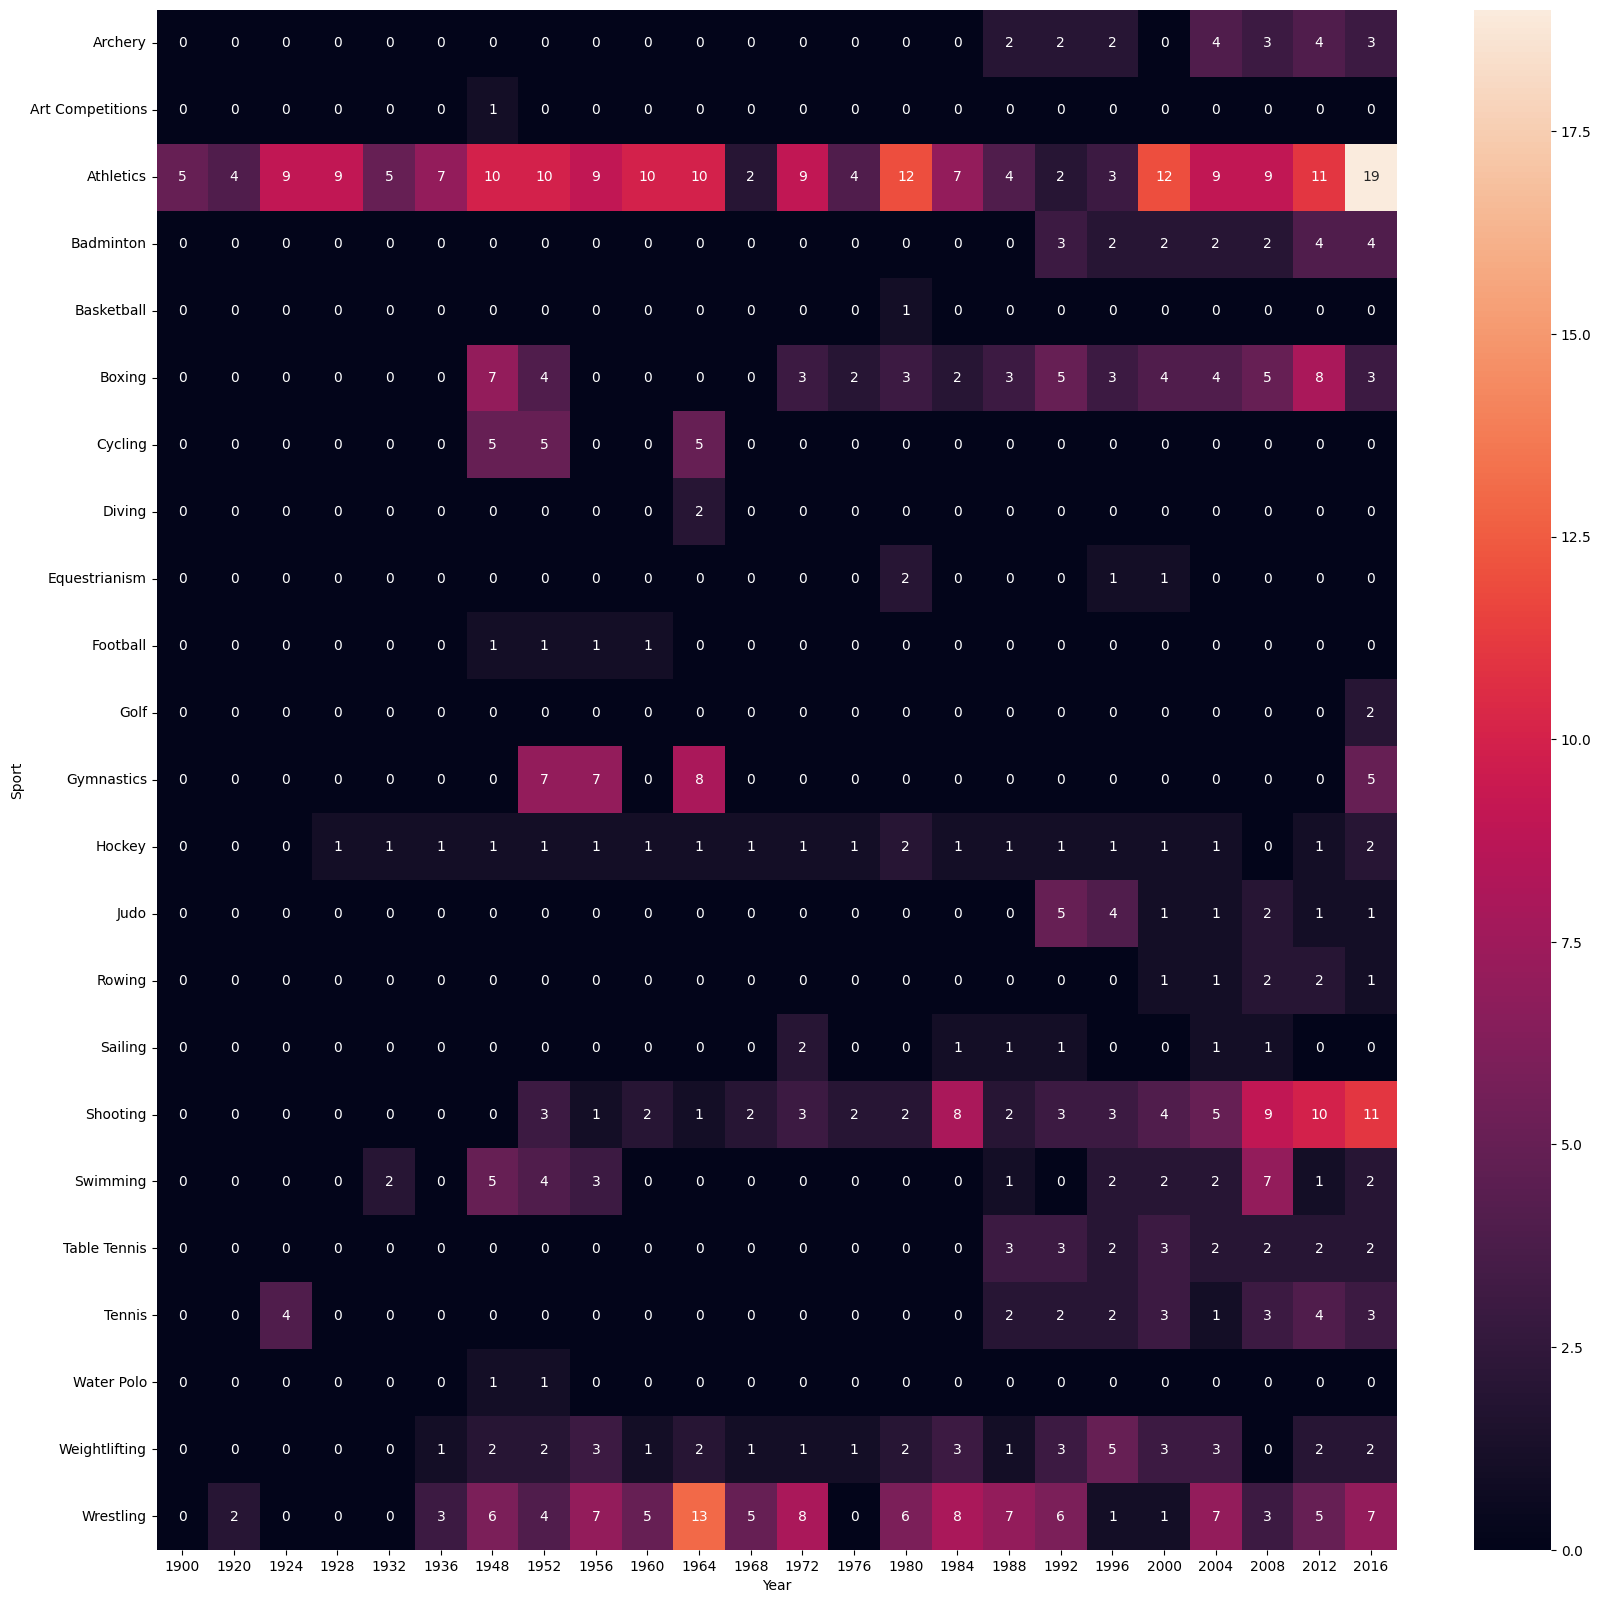

In [70]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [71]:
def heat_map(df,country):
  x = event_df[event_df['region'] == country].drop_duplicates(['Year', 'Sport', 'Event'])
  x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int')
  return x


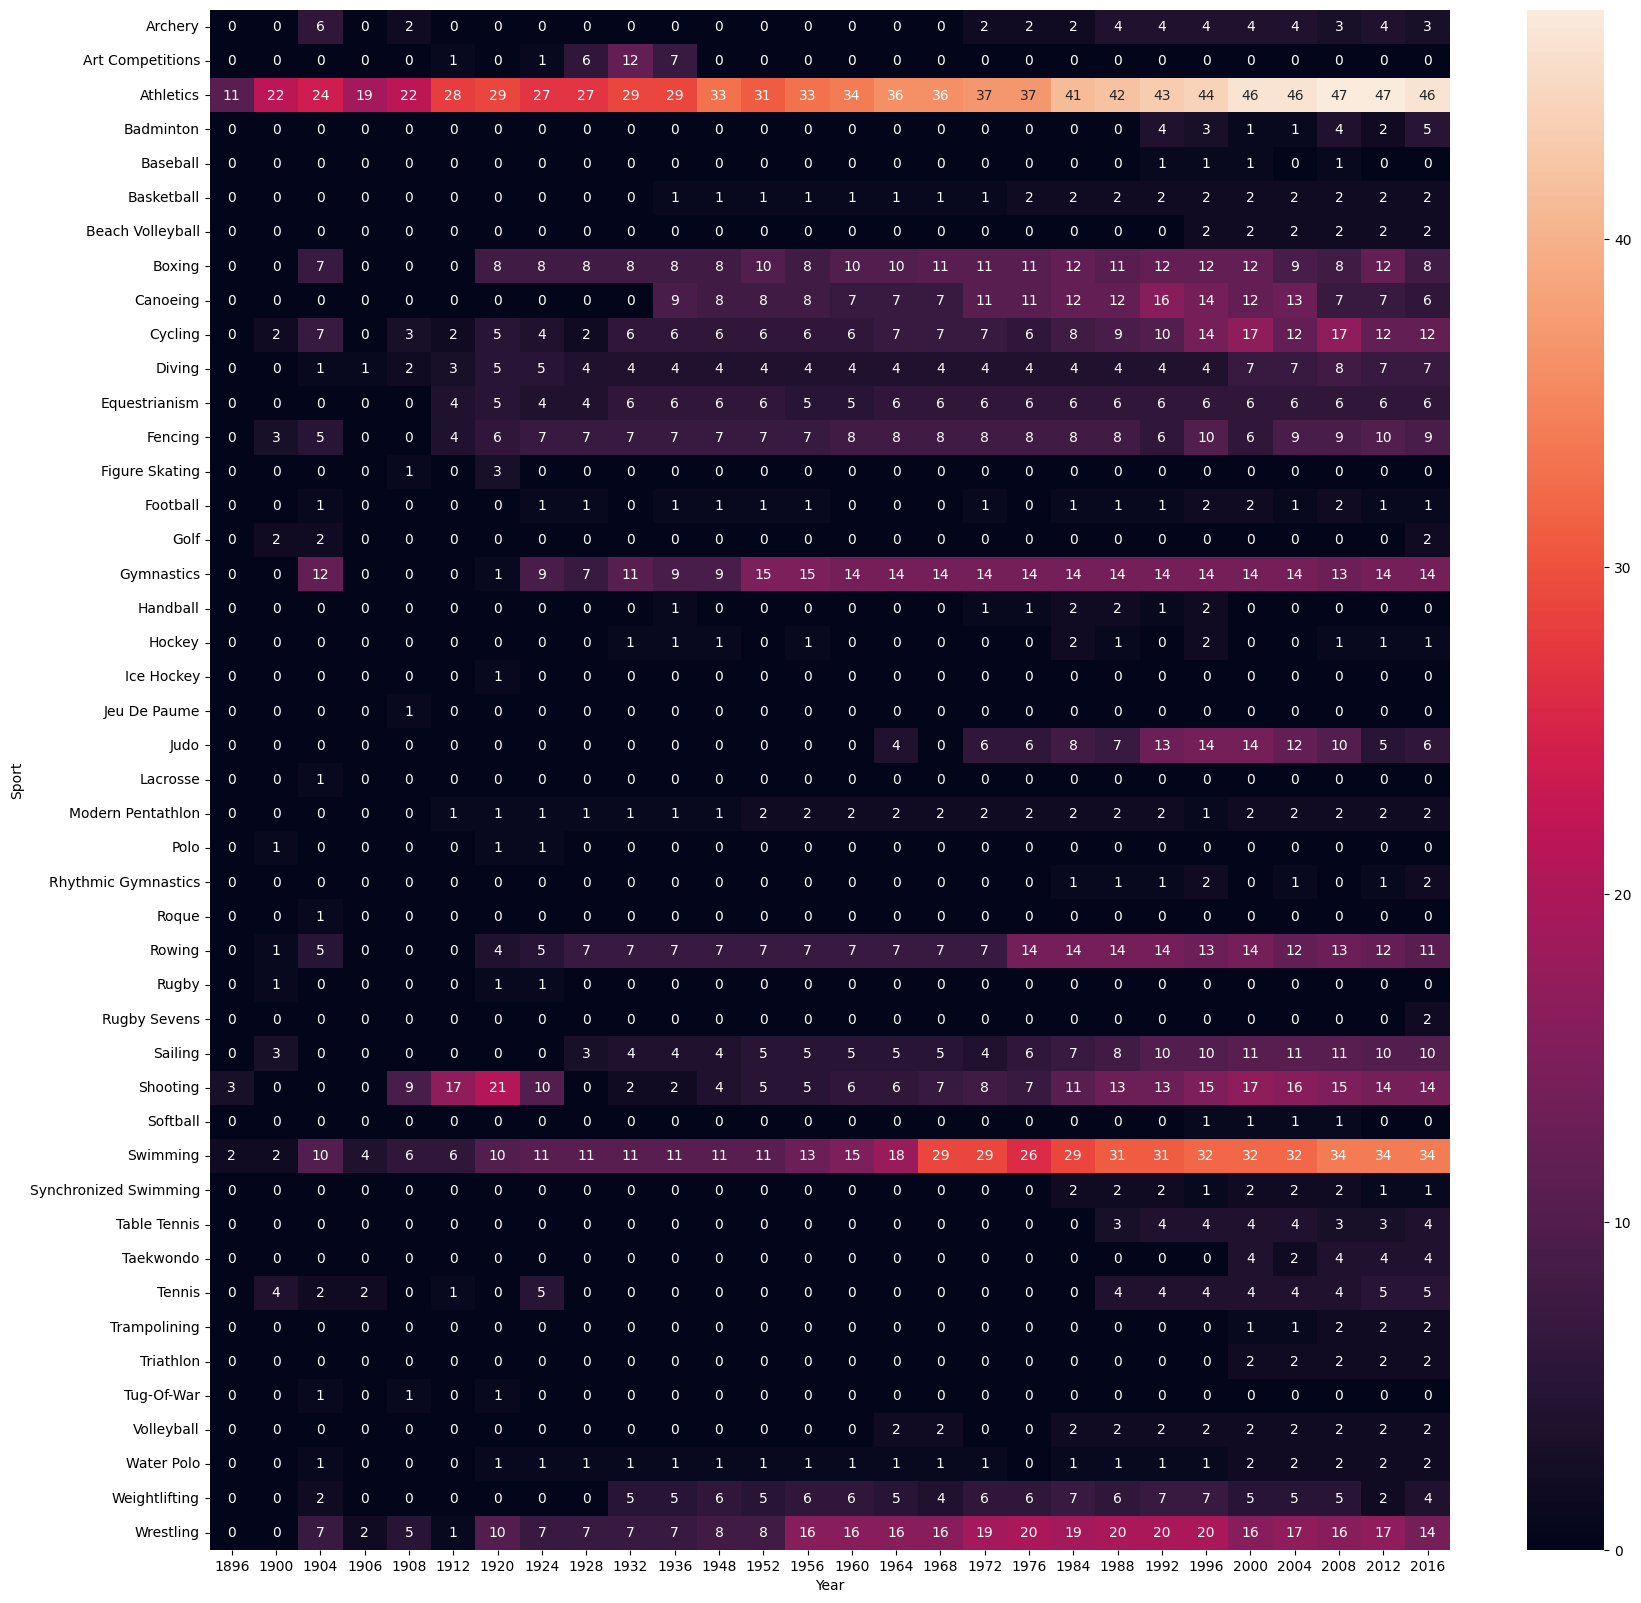

In [72]:
fig, ax = plt.subplots(figsize=(20, 20))
x = heat_map(event_df,'USA')
ax = sns.heatmap(
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype('int'),annot=True)

In [73]:
def most_successfull(df,country):
  temp_df = df.dropna(subset=['Medal'])

  temp_df = temp_df[temp_df['region'] == country]

  # Rename columns after reset_index to 'Name' and 'count'
  athlete_medal_counts = temp_df['Name'].value_counts().reset_index()
  x = athlete_medal_counts.head(20).merge(temp_df,left_on='Name',right_on='Name',how='left').drop_duplicates('Name')
  return x[['Name','count']]

In [74]:
most_successfull(event_df,'India').reset_index()

,index,Name,count
0,0,Leslie Walter Claudius,4
1,4,Udham Singh Kular,4
2,8,"Victor John ""V. J."" Peter",3
3,11,Dhyan Chand Bais,3
4,14,Richard James Allen,3
5,17,Shankar Pillay Laxman,3
6,20,Balbir Singh,3
7,23,Harbinder Singh Chimni,3
8,26,Prithipal Singh,3
9,29,Ranganathan Francis,3


In [75]:
athlete_df = event_df.drop_duplicates(subset=['Name','region'])

In [76]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal'] == 'Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal'] == 'Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal'] == 'Bronze']['Age'].dropna()


In [77]:
# making distplot
fig = ff.create_distplot([x1,x2,x3,x4],['Age Distribution','Gold medalist','Silver Medalist','Bronze Medalist'],show_hist = False, show_rug = False)
fig.show()

In [78]:
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [79]:
x = []
name = []
famous_sports = ['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
                     'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
                     'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
                     'Water Polo', 'Hockey', 'Rowing', 'Fencing',
                     'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
                     'Tennis', 'Golf', 'Softball', 'Archery',
                     'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
                     'Rhythmic Gymnastics', 'Rugby Sevens',
                     'Beach Volleyball', 'Triathlon', 'Rugby', 'Polo', 'Ice Hockey']
for sport in famous_sports:
        temp_df = athlete_df[athlete_df['Sport'] == sport]
        x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna())
        name.append(sport)

In [80]:
type(famous_sports)

list

In [81]:
fig = ff.create_distplot(x, name, show_hist=False, show_rug=False)
fig.show()

In [82]:
event_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [83]:
male = athlete_df[athlete_df['Sex'] == 'M'].groupby('Year').count()['Name'].reset_index()
female = athlete_df[athlete_df['Sex'] == 'F'].groupby('Year').count()['Name'].reset_index()

In [84]:
male.rename(columns={'Name':'Count'},inplace=True)
female.rename(columns={'Name':'Count'},inplace=True)

In [85]:
male['Count'].sum() + female['Count'].sum()

np.int64(116885)

In [86]:
athlete_df.shape[0]

116885

In [87]:
final = male.merge(female,on='Year',how = 'left')
final.fillna(0,inplace=True)
final.rename(columns={'Count_x': 'Male', 'Count_y': 'Female'}, inplace=True)

In [88]:
final

,Year,Male,Female
0,1896,174,0.0
1,1900,1181,23.0
2,1904,629,6.0
3,1906,759,6.0
4,1908,1772,44.0
5,1912,1978,53.0
6,1920,2280,73.0
7,1924,2535,132.0
8,1928,2342,285.0
9,1932,1382,162.0


In [89]:
fig = px.line(x=final['Year'],y=[final['Male'],final['Female']])
fig.show()